In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten , Dense , MaxPooling2D,Dropout,Conv2D
import matplotlib.pyplot as plt
import numpy as np

In [22]:
mnist = tf.keras.datasets.mnist

In [23]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [24]:
input_shape = (28,28,1)

In [25]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [26]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
print("Shape of trining : " , x_train.shape)
print("Shape of testing : " , x_test.shape)

Shape of trining :  (60000, 28, 28, 1)
Shape of testing :  (10000, 28, 28, 1)


In [35]:
model = Sequential()
model.add(Conv2D(28,kernel_size = (3,3) ,input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(200,activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))

In [36]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer= "adam" , loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [39]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9823 - loss: 0.0542
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9875 - loss: 0.0406
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9885 - loss: 0.0336
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9906 - loss: 0.0290
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9916 - loss: 0.0231
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0204
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9942 - loss: 0.0174
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9944 - loss: 0.0164
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9945 - loss: 0.0154
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9953 - loss: 0.0154


In [40]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9826 - loss: 0.0792


In [41]:
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

Loss=0.065
Accuracy=0.986


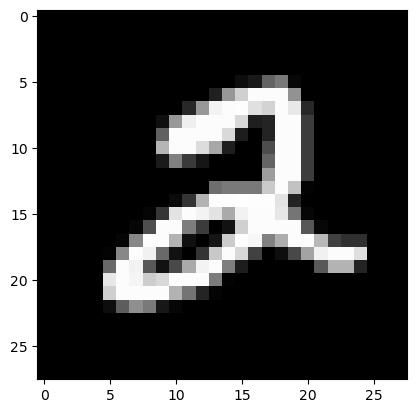

In [56]:
image = x_train[5]
plt.imshow(np.squeeze(image),cmap = "gray")
plt.show()

In [57]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print( "Pedicted class:{}". format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Pedicted class:2
